In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df = pd.read_csv("out/data.csv")
df['Start Time'] = pd.to_datetime(df['Start Time'])
df.head()

,ID,Start Time,Duration,Duration Milliseconds,Status,Error
0,GET /,2024-02-12 11:33:28+01:00,346.581375ms,346,200 OK,NaN
1,GET /,2024-02-12 11:33:28+01:00,348.042917ms,348,200 OK,NaN
2,GET /,2024-02-12 11:33:28+01:00,348.089375ms,348,200 OK,NaN
3,GET /,2024-02-12 11:33:28+01:00,348.116459ms,348,200 OK,NaN
4,GET /anything,2024-02-12 11:33:28+01:00,299.187208ms,299,200 OK,NaN


In [65]:
df.groupby(['ID','Status']).count()

,,Start Time,Duration,Duration Milliseconds,Error
ID,Status,,,,
GET /,200 OK,256,256,256,0
GET /anything,200 OK,256,256,256,0
PUT /anything,200 OK,255,255,255,0


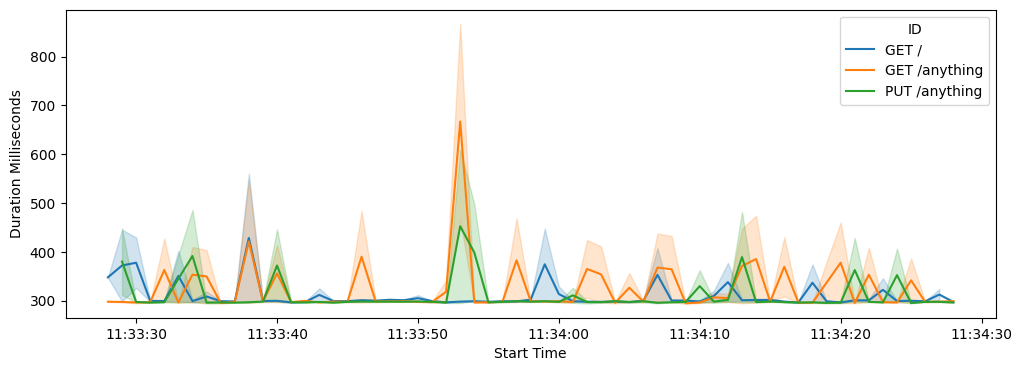

In [66]:
plt.figure(figsize=(12,4))
sns.lineplot(data=df,x='Start Time',y='Duration Milliseconds',hue="ID",errorbar='se')
plt.show()

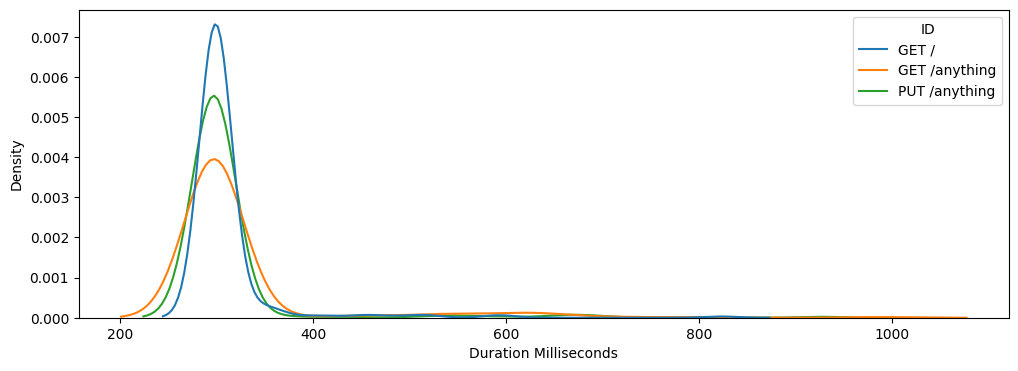

In [67]:
plt.figure(figsize=(12,4))
sns.kdeplot(data=df,x='Duration Milliseconds',hue="ID")
plt.show()